# 1. Game of Life

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("../style.mplstyle")
plt.rcParams["figure.figsize"] = (10, 8)

from tqdm import tqdm

from game_of_life import GameOfLife

# 2. Equilibration

In [2]:
nruns = 10000

times = np.zeros(nruns)

for i in tqdm(range(nruns), unit="run"):
    game = GameOfLife(N=50, starting_grid="random")
    times[i] = game.equilibration_time()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:27<00:00, 366.47run/s]


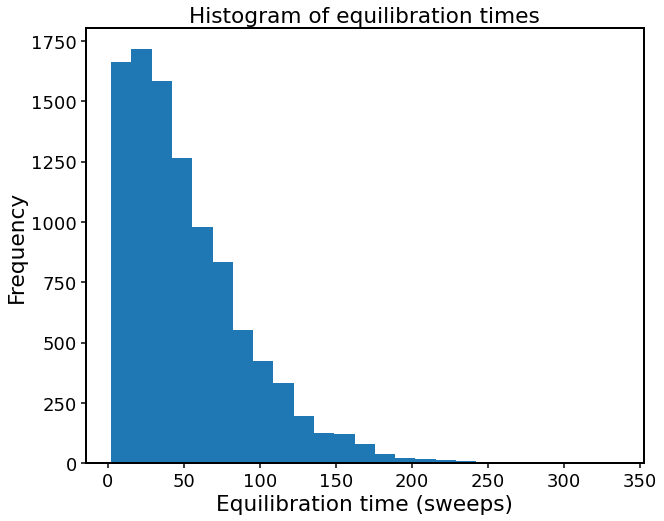

In [3]:
fig, ax = plt.subplots()
ax.hist(times, bins=25)
ax.set_title("Histogram of equilibration times")
ax.set_xlabel("Equilibration time (sweeps)")
ax.set_ylabel("Frequency")
plt.show()

# 3. Glider Speed

In [7]:
game = GameOfLife(starting_grid="zeros")
game.add_glider(2, 2)  # need to be careful of the ghost cells
r_intial = game.calculate_centre_of_mass()

time = 150
times = []
speeds = []

for t in range(1, time+1):
    game.update_grid()

    r_final = game.calculate_centre_of_mass()
    velocity = (r_final - r_intial) / t
    times.append(t)
    speeds.append(np.linalg.norm(velocity))

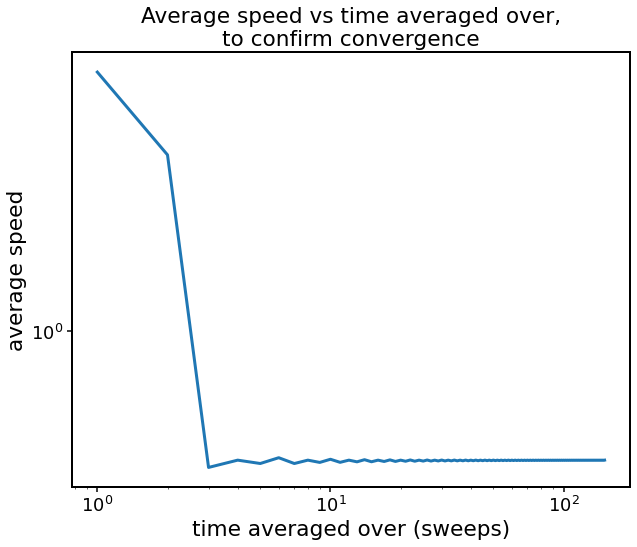

In [8]:
plt.loglog(times, speeds)
plt.title("Average speed vs time averaged over,\nto confirm convergence")
plt.ylabel("average speed")
plt.xlabel("time averaged over (sweeps)")
plt.show()

In [6]:
print(f"Average glider speed is: {speeds[-1]:.4f} cells per sweep")

Average glider speed is: 0.3536 cells per sweep
